In [17]:
from __future__ import print_function
import cv2 
import numpy as np
import random as rng
import matplotlib.pyplot as plt

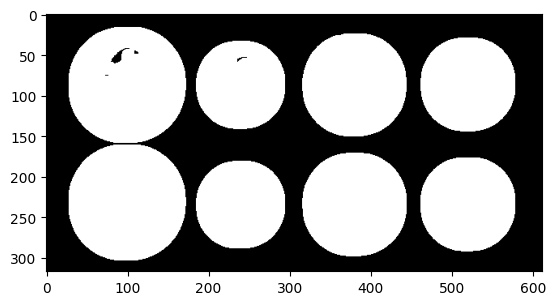

In [18]:
img = cv2.imread('images/coins1.jpg', cv2.IMREAD_COLOR)
img1 = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5),np.uint8)
img = cv2.GaussianBlur(img, (11,11), 0)
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
img = cv2.dilate(img, kernel, iterations=2)
plt.imshow(img, cmap='gray')

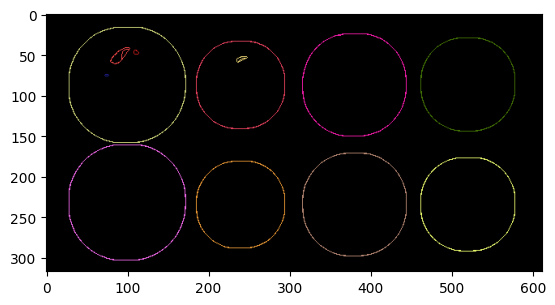

In [19]:
contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hull_list = []
for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    hull_list.append(hull)

# Draw contours + hull results
drawing = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv2.drawContours(drawing, contours, i, color)
    cv2.drawContours(drawing, hull_list, i, color)

# Show in a window
plt.imshow(drawing)